In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings("ignore")

# The following data are obtained from https://github.com/hwchase17/sportvu

data13 = pd.read_csv("https://raw.githubusercontent.com/hwchase17/sportvu/master/joined_shots_2013.csv")
data13['season'] = ['2013' for _ in range(len(data13))]
data14 = pd.read_csv("https://raw.githubusercontent.com/hwchase17/sportvu/master/joined_shots_2014.csv")
data14['season'] = ['2014' for _ in range(len(data14))]


data = pd.concat([data13,data14],ignore_index=True)
data = data[data["TOUCH_TIME"] >= 0]

In [ ]:
data.head()

,Unnamed: 0,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FGM,FINAL_MARGIN,GAME_CLOCK,GAME_ID,GAME_ID.1,...,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,season
0,0,"Turner, Evan",202323.0,1.9,17.0,0.0,10.0,8:09,21300165,21300165,...,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6.0,-40.0,53.0,1.0,0.0,2013
1,1,"Turner, Evan",202323.0,3.2,0.0,1.0,10.0,9:10,21300165,21300165,...,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,182.0,195.0,1.0,1.0,2013
2,2,"Carter-Williams, Michael",203487.0,3.5,0.0,0.0,10.0,8:36,21300165,21300165,...,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26.0,159.0,206.0,1.0,0.0,2013
3,3,"Brown, Lorenzo",203485.0,3.6,19.0,0.0,10.0,0:23,21300165,21300165,...,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27.0,-15.0,274.0,1.0,0.0,2013
4,0,"Cole, Norris",202708.0,3.7,0.0,1.0,-7.0,11:43,21300230,21300230,...,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24.0,-149.0,198.0,1.0,1.0,2013


In [ ]:
#Use for exploring other classifiers
import scipy as sp
from scipy import stats
import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

os.environ['KMP_DUPLICATE_LIB_OK']='True'

data = data[["CLOSE_DEF_DIST","DRIBBLES","SHOT_DIST","SHOT_CLOCK","TOUCH_TIME","CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE","SHOT_MADE_FLAG",'season']]
data = pd.get_dummies(data,columns=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"],prefix=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"])
data = data.dropna()
# here you can change the argument for training with a different season
data = data[data['season'] == '2014']

data = data.drop(['season'], axis = 1)

train_X = data.drop(['SHOT_MADE_FLAG'],axis = 1)
train_y = to_categorical(data['SHOT_MADE_FLAG'])

In [ ]:
data.head()

,CLOSE_DEF_DIST,DRIBBLES,SHOT_DIST,SHOT_CLOCK,TOUCH_TIME,SHOT_MADE_FLAG,CLOSEST_DEFENDER_PLAYER_ID_708.0,CLOSEST_DEFENDER_PLAYER_ID_951.0,CLOSEST_DEFENDER_PLAYER_ID_959.0,CLOSEST_DEFENDER_PLAYER_ID_965.0,...,ACTION_TYPE_Running Slam Dunk Shot,ACTION_TYPE_Running Tip Shot,ACTION_TYPE_Slam Dunk Shot,ACTION_TYPE_Step Back Jump shot,ACTION_TYPE_Tip Shot,ACTION_TYPE_Turnaround Bank Hook Shot,ACTION_TYPE_Turnaround Bank shot,ACTION_TYPE_Turnaround Fadeaway shot,ACTION_TYPE_Turnaround Hook Shot,ACTION_TYPE_Turnaround Jump Shot
200963,2.2,20.0,18.1,7.5,15.8,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200964,4.1,6.0,20.8,14.6,8.8,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200965,3.2,7.0,13.8,10.9,7.4,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200966,8.2,0.0,22.5,10.5,1.1,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200967,4.3,8.0,24.9,17.2,6.5,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
print(train_X.shape)
print(train_y.shape)

(191753, 1212)
(191753, 2)


In [ ]:
# Lightgbm
!pip install lightgbm
import lightgbm as lgb

#Train model13
data = pd.concat([data13,data14],ignore_index=True)
data = data[data["TOUCH_TIME"] >= 0]

data = data[["CLOSE_DEF_DIST","DRIBBLES","SHOT_DIST","SHOT_CLOCK","TOUCH_TIME","CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE","SHOT_MADE_FLAG",'season']]
data = pd.get_dummies(data,columns=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"],prefix=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"])
data = data.dropna()
# here you can change the argument for training with a different season
data = data[data['season'] == '2013']

data = data.drop(['season'], axis = 1)

train_X = data.drop(['SHOT_MADE_FLAG'],axis = 1)
train_y = data['SHOT_MADE_FLAG']

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1, # Suppress verbose output
    'n_estimators': 100 # Number of boosting rounds
}

# Create LightGBM Dataset objects
lgb_train13 = lgb.Dataset(train_X, train_y)

# Train the LightGBM model
lgb_model13 = lgb.train(params, lgb_train13, num_boost_round=100)

#Train model14
data = pd.concat([data13,data14],ignore_index=True)
data = data[data["TOUCH_TIME"] >= 0]

data = data[["CLOSE_DEF_DIST","DRIBBLES","SHOT_DIST","SHOT_CLOCK","TOUCH_TIME","CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE","SHOT_MADE_FLAG",'season']]
data = pd.get_dummies(data,columns=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"],prefix=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"])
data = data.dropna()
# here you can change the argument for training with a different season
data = data[data['season'] == '2014']

data = data.drop(['season'], axis = 1)

train_X = data.drop(['SHOT_MADE_FLAG'],axis = 1)
train_y = data['SHOT_MADE_FLAG']

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1, # Suppress verbose output
    'n_estimators': 100 # Number of boosting rounds
}

# Create LightGBM Dataset objects
lgb_train14 = lgb.Dataset(train_X, train_y)

# Train the LightGBM model
lgb_model14 = lgb.train(params, lgb_train14, num_boost_round=100)


In [ ]:
data = pd.concat([data13,data14],ignore_index=True)
data = data[data["TOUCH_TIME"] >= 0]
test = data
test = test[["CLOSE_DEF_DIST","DRIBBLES","SHOT_DIST","SHOT_CLOCK","TOUCH_TIME","CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE","SHOT_MADE_FLAG","season"]]
test = pd.get_dummies(test,columns=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"],prefix=["CLOSEST_DEFENDER_PLAYER_ID","PLAYER_ID","ACTION_TYPE"])
test = test.dropna()

tmp = test[test["season"] == '2013']
#predictions13 =  model14.predict(tmp.drop(['season','SHOT_MADE_FLAG'],axis = 1))
predictions13 =  lgb_model14.predict(tmp.drop(['season','SHOT_MADE_FLAG'],axis = 1),num_iteration=lgb_model14.best_iteration)
tmp = test[test["season"] == '2014']
#predictions14 =  model13.predict(tmp.drop(['season','SHOT_MADE_FLAG'],axis = 1))
predictions14 =  lgb_model13.predict(tmp.drop(['season','SHOT_MADE_FLAG'],axis = 1),num_iteration=lgb_model13.best_iteration)

test = data
test = test.dropna()

test['prob'] = list(predictions13[:])+list(predictions14[:])

Test set accuracy:  0.6546166714268228
The model's brier score is:  0.21538737447391743
The climatology's brier score is:  0.24793219794785007


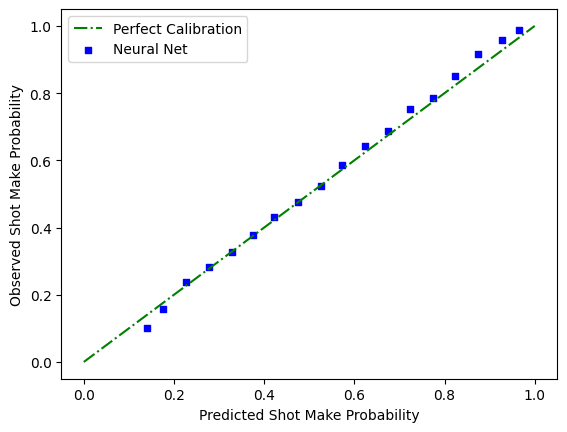

In [ ]:
# evaluate the error on the data that will not be used for the hot hand

SHOT_THRES = 1000


predictions = []
shot_outcome = []

#test1 = test[test["season"] == '2014']

#shots_pl = test.groupby('PLAYER_ID')
shots_pl = test.groupby('PLAYER_ID')

players = []

#for p in test1['PLAYER_ID'].unique():
for p in test['PLAYER_ID'].unique():
    if len(shots_pl.get_group(p)) > SHOT_THRES:
        players.append(p)

for p in players:
    player_df = shots_pl.get_group(p)
    player_df_games = player_df.groupby("GAME_ID")
    # find the games that we have full data for the player
    games_p = []
    good_shots = 0
    for g in player_df['GAME_ID'].unique():
        tmp = player_df_games.get_group(g)
        if len(tmp.SHOT_NUMBER)-max(tmp.SHOT_NUMBER)==0:
            games_p.append(g)
            good_shots += len(tmp.SHOT_NUMBER)

    for g in games_p:
        tmp = list(player_df_games.get_group(g)['SHOT_MADE_FLAG'])
        tmp_prob = list(player_df_games.get_group(g)['prob'])
        for i in range(len(list(tmp))-1):
            if list(tmp)[i] == 1:
                predictions.append(list(tmp_prob)[i+1])
                shot_outcome.append(list(tmp)[i+1])

print("Test set accuracy: ",np.sum(np.round(predictions) == shot_outcome)/len(shot_outcome))

# brier score

print("The model's brier score is: ",  brier_score_loss(shot_outcome,predictions))
print("The climatology's brier score is: ", brier_score_loss(shot_outcome,(sum(shot_outcome)/len(shot_outcome))*np.ones(len(shot_outcome))))
observed, predicted = calibration_curve(shot_outcome, predictions, n_bins = 20)

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.linspace(0,1,10000)
y = x
ax1.plot(x,y,'-.g',label="Perfect Calibration")

ax1.scatter(predicted,observed,s=20, c='b', marker="s", label = "Neural Net")


plt.xlabel("Predicted Shot Make Probability")
plt.ylabel("Observed Shot Make Probability")
plt.legend(loc='upper left');
plt.show()

Overall test set accuracy: 0.6546166714268228


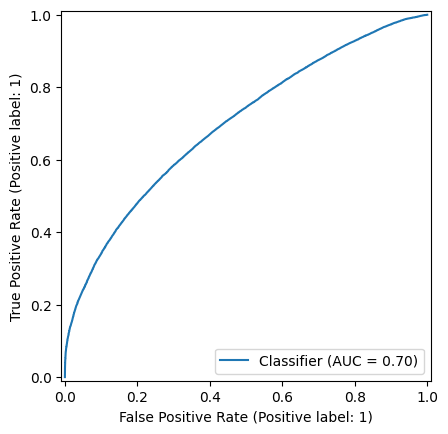

In [ ]:
y_prob = predictions
y_pred = np.round(predictions)
yt = shot_outcome

from sklearn.metrics import accuracy_score

# Calculate overall accuracy
overall_accuracy = accuracy_score(yt, y_pred)
print(f"Overall test set accuracy: {overall_accuracy}")

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

RocCurveDisplay.from_predictions(yt, y_prob)
plt.show()

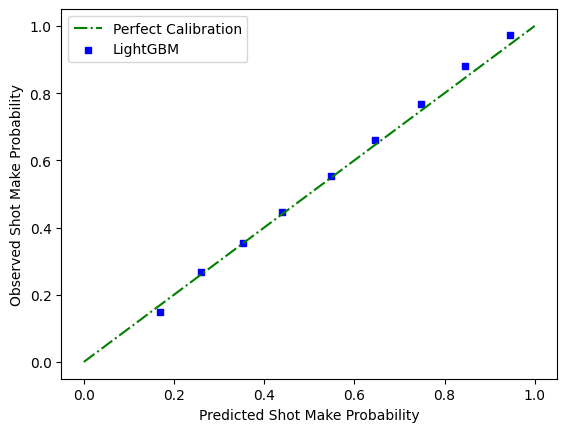

In [ ]:
observed, predicted = calibration_curve(shot_outcome, predictions, n_bins = 10)

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.linspace(0,1,10000)
y = x
ax1.plot(x,y,'-.g',label="Perfect Calibration")

ax1.scatter(predicted,observed,s=20, c='b', marker="s", label = "LightGBM")


plt.xlabel("Predicted Shot Make Probability")
plt.ylabel("Observed Shot Make Probability")
plt.legend(loc='upper left');
plt.show()

In [ ]:
print(test[['PLAYER_ID', 'PLAYER_NAME']].drop_duplicates())

        PLAYER_ID        PLAYER_NAME
0        202779.0      Dwight Buycks
48       200745.0    Andrea Bargnani
545      200746.0  LaMarcus Aldridge
1912     200751.0         Randy Foye
2758     200752.0           Rudy Gay
...           ...                ...
372008   202366.0      Jerome Jordan
374602   202407.0     Elijah Millsap
393933   202703.0     Nikola Mirotic
397409   202711.0   Bojan Bogdanovic
399867   202723.0        Malcolm Lee

[573 rows x 2 columns]


In [ ]:
import re
def count_consecutive_ones_string(sequence, k):
  # Convert the sequence (e.g., list of ints) to a string of '0's and '1's
  sequence_str = "".join(map(str, sequence))

  # Create the substring of k consecutive '1's
  consecutive_ones_str = '1' * k

  matches = re.findall(f'(?={re.escape(consecutive_ones_str)})', sequence_str)
  return len(matches)

def count_consecutive_ones(sequence, k):
  #Count number of k-consecutive 1's where overlapping is allowed. "111011" has 3 2-consecutive 1's.
    count = 0
    consecutive_count = 0
    for bit in sequence:
        if bit == 1:
            consecutive_count += 1
        else:
            consecutive_count = 0
        if consecutive_count == k:
            count += 1
            consecutive_count -= 1  # Overlapping allowed
    return count

def consecutive_nk(n, k1, prob, num_sim):
  counts_of_consecutive_ones_from_new_sequences = []
  for _ in range(num_sim):
    random_sequence = np.random.choice([0, 1], size=n, p=[1-prob, prob])
    consecutive_ones_count = count_consecutive_ones(random_sequence, k=k1)
    counts_of_consecutive_ones_from_new_sequences.append(consecutive_ones_count)
    per_t5 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 95)
    per_t1 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99)
    per_t05 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99.5)
    per_t01 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99.9)
  return per_t5, per_t1, per_t05, per_t01, np.mean(counts_of_consecutive_ones_from_new_sequences), np.std(counts_of_consecutive_ones_from_new_sequences)

def consecutive_nk_p(n, k1, prob_s, num_sim):
  counts_of_consecutive_ones_from_new_sequences = []

  for _ in range(num_sim):
    random_sequence = [np.random.choice([0, 1], p=[1 - p_one, p_one]) for p_one in prob_s]
    consecutive_ones_count = count_consecutive_ones(random_sequence, k=k1)
    counts_of_consecutive_ones_from_new_sequences.append(consecutive_ones_count)
    per_t5 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 95)
    per_t1 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99)
    per_t05 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99.5)
    per_t01 = np.percentile(counts_of_consecutive_ones_from_new_sequences, 99.9)
  return per_t5, per_t1, per_t05, per_t01, np.mean(counts_of_consecutive_ones_from_new_sequences), np.std(counts_of_consecutive_ones_from_new_sequences)

def consecutive_nk_pv(n, k1, prob_s, nsk, num_sim):
  count_nsk = 0
  count_mean = 0
  for _ in range(num_sim):
    random_sequence = [np.random.choice([0, 1], p=[1 - p_one, p_one]) for p_one in prob_s]
    consecutive_ones_count = count_consecutive_ones(random_sequence, k=k1)
    count_mean += consecutive_ones_count
    if consecutive_ones_count >= nsk:
      count_nsk += 1
  return count_nsk/num_sim, count_mean/num_sim

def consecutive_nk_pv2(n, k1, prob_s, nsk, num_sim):
  count_nsk = 0
  count_dist = np.zeros(n - k1 + 2)
  for _ in range(num_sim):
    random_sequence = [np.random.choice([0, 1], p=[1 - p_one, p_one]) for p_one in prob_s]
    consecutive_ones_count = count_consecutive_ones(random_sequence, k=k1)
    count_dist[consecutive_ones_count] += 1

  count_dist = count_dist/num_sim
  max_index = np.argmax(count_dist)
  max_count_dist = count_dist[max_index]

  pd1 = count_dist[nsk]
  return pd1, max_count_dist, max_index


In [ ]:
# modified for streak number test, return p-value

p_name = 'Kemba Walker'
p_id = data[data['PLAYER_NAME'] == p_name]['PLAYER_ID'].unique()

SHOT_THRES = 1000

B = 500

shots_pl = test.groupby('PLAYER_ID')

players = []

for p in test['PLAYER_ID'].unique():
    if len(shots_pl.get_group(p)) > SHOT_THRES:
        players.append(p)

for kk in range(3):
    k_streak = kk + 4
    print("k = ", k_streak)
    for p in players:
      #if p in p_id: #select single players, comment out this line if for all players
        player_df = shots_pl.get_group(p)
        player_df_games = player_df.groupby("GAME_ID")

        # find the games that we have full data for the player
        games_p = []
        good_shots = 0
        for g in player_df['GAME_ID'].unique():
            tmp = player_df_games.get_group(g)
            if len(tmp.SHOT_NUMBER)-max(tmp.SHOT_NUMBER)==0:
                games_p.append(g)
                good_shots += len(tmp.SHOT_NUMBER)
            #else:
              #print(g, tmp.SHOT_NUMBER, max(tmp.SHOT_NUMBER))

        if good_shots < 500:
            continue

        t_shot_made = 0
        t_prob = 0
        t_nstreak = 0
        n_shots_all=[]
        for g in games_p:
            tmp = list(player_df_games.get_group(g)['SHOT_MADE_FLAG'])
            probs = list(player_df_games.get_group(g)['prob'])
            t_shot_made += sum(tmp)
            t_prob += sum(probs)

            if len(tmp) >= k_streak:
              n_streak = count_consecutive_ones(tmp,k_streak)

            t_nstreak += n_streak
            n_shots_all.append(len(tmp))

        #Shot-make probability adjustment
        prob_adj = t_shot_made/t_prob


        sim_streak_all = []

        for i in range(B):
          sim_streak = 0
          for g in games_p:
            probs = list(player_df_games.get_group(g)['prob'])

            n_shots = len(probs)
            if n_shots >= k_streak:
              probs_adj = np.clip(np.array(probs)*prob_adj, 0, 1)
              random_sequence = [np.random.choice([0, 1], p=[1 - p_one, p_one]) for p_one in probs_adj]
              sim_streak += count_consecutive_ones(random_sequence, k_streak)

            sim_streak_all.append(sim_streak)


        #like_ratio = 1
        #for j in range(len(games_p)):
        #  if pv_all[j] > 0.0000001:
        #    like_ratio *= pv_all[j] / max_count_dist_all[j]

        #  print(game_id_all[j], ",", n_shots_all[j], ",", n_streak_all[j], ",", pv_all[j], ",", like_ratio, ",", max_count_dist_all[j],",", max_index_all[j])

        per_t5 = np.percentile(sim_streak_all, 95)
        per_t1 = np.percentile(sim_streak_all, 99)
        total_shots = np.sum(n_shots_all)
        mean_streak = np.mean(sim_streak_all)
        std_streak = np.std(sim_streak_all)
        p_value = np.sum(np.array(sim_streak_all) >= t_nstreak) / len(sim_streak_all)

        print(data[data['PLAYER_ID'] == p].reset_index().iloc[0]['PLAYER_NAME'], ", ", len(games_p), ", ", total_shots, ", ", end='')
        print(t_nstreak, ", ", p_value, ", ", per_t5, ", ", per_t1, ", ", mean_streak, ", ", std_streak)


k =  4
LaMarcus Aldridge ,  76 ,  1463 , 63 ,  0.06821052631578947 ,  65.0 ,  76.0 ,  33.36823684210526 ,  18.90593492298984
Randy Foye ,  95 ,  835 , 14 ,  0.21347368421052632 ,  20.0 ,  24.0 ,  8.508336842105264 ,  5.9404974071564185
Rudy Gay ,  100 ,  1547 , 71 ,  0.02756 ,  66.0 ,  78.0 ,  33.63376 ,  20.152418918392897
JJ Redick ,  93 ,  1072 , 35 ,  0.10253763440860215 ,  39.0 ,  47.0 ,  18.341505376344085 ,  11.888238422390659
Mike Dunleavy ,  123 ,  1025 , 17 ,  0.23691056910569105 ,  24.0 ,  30.0 ,  10.938617886178863 ,  7.494400383896742
Kyle Lowry ,  91 ,  1222 , 22 ,  0.22516483516483515 ,  32.0 ,  39.0 ,  13.55778021978022 ,  10.017791969875232
PJ Tucker ,  130 ,  926 , 21 ,  0.111 ,  24.0 ,  29.0 ,  10.576892307692308 ,  7.671758089799389
Paul Millsap ,  107 ,  1415 , 53 ,  0.08512149532710281 ,  57.0 ,  68.0 ,  27.707009345794393 ,  16.966054273107922
Jose Juan Barea ,  124 ,  890 , 20 ,  0.010580645161290323 ,  15.0 ,  20.0 ,  6.49066129032258 ,  4.922746074858403
Pau G